# Exercise 2

This notebook shows how we can perform linear regression on a dataset, this time using gradient descent.

We generate a noisy dataset (same as in a previous exercise):

In [7]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As you can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

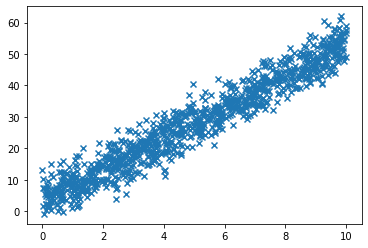

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Your tasks in this notebook are:
 - Add a column of ones to `X`, as we want to simplify the bias calculation
 - Generate a weight matrix with random values with the following code: `weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)`, where num_features is the number of columns in your extended X array.
 - Calculate the predictions as you did in the first exercise, with a matrix multiplication.
 - Calculate the loss based on the mean-squared-error.
 - Derive a formula for calculating the gradient for this example. Then, implement it using numpy. The result of the gradient should be `[[-309.6635798 ]
 [ -47.95719634]]`
 - Write a loop that performs loss calculation, gradient calculation and updating the weights via a defined learning rate for a given number of iterations (e.g. 100 or 1000). Does it converge? Try different learning rates.
 - If your solution converges, draw the regressed line along with the data points.

## Solution

In [9]:
import numpy as np
ones = np.ones(X.shape)
X_extended = np.c_[X, ones]
num_feat = X_extended.shape[-1]
weights = (np.random.rand(num_feat).reshape(-1, 1) * 2 - 1) / np.sqrt(num_feat)
prediction = np.matmul(X_extended, weights)
loss = np.sum(np.square(prediction - ground_truth)) / ground_truth.shape[0]
print("Loss: %.3f" % loss)

Loss: 870.334


$\frac{\partial L}{\partial \mathbf{w}} = \frac{\partial L}{\partial y} \frac{\partial y}{\partial \mathbf{w}} = \frac{1}{N} \cdot \sum_y{2(y-y_T)\frac{\partial y}{\partial \mathbf{w}}}
= \frac{2}{N} \cdot \sum_x{(y - y_T)(x, 1)} = \frac{2}{N} \cdot \sum_x{\left((x, 1) \begin{pmatrix}w_1 \\ w_2 \end{pmatrix} - y_T \right)(x, 1)}$

In [32]:
grad = 2 * np.sum(np.multiply(np.subtract(prediction, ground_truth), X_extended), axis=0) / X_extended.shape[0]
print("My version")
print(grad)
#  This is the formula from the script which yields the same result. But somehow it is different from what is stated above. I don't see the error however
print("Gradient from the script (ML-Basics, page 16)")
print((2 * X_extended.T @ X_extended @ weights - 2 * X_extended.T @ ground_truth) / 1000)

My version
[-318.7598694   -49.56440831]
Gradient from the script (ML-Basics, page 16)
[[-318.7598694 ]
 [ -49.56440831]]


Solving the linear regression problem. Note: Gradient decent seems to diverge some times depending on the random initialization of the weights.
Just run the section multiple times until it does converge. 

In [22]:
def calc_grad(pred, gt, inp):
    return np.expand_dims(2 * np.sum(np.multiply(np.subtract(pred, gt), inp), axis=0) / inp.shape[0], axis=-1)

def calc_loss(pred, gt):
    return np.sum(np.square(pred - gt)) / gt.shape[0]

num_epochs = 500
eta = 0.001
num_feat = X_extended.shape[-1]
weights = (np.random.rand(num_feat).reshape(-1, 1) * 2 - 1) / np.sqrt(num_feat)
for epoch in range(num_epochs):
    prediction = np.matmul(X_extended, weights)
    print("Loss in epoch %d: %.2f" % (epoch, calc_loss(prediction, ground_truth)))
    grad = calc_grad(prediction, ground_truth, X_extended)
    weights -= eta * np.multiply(grad, weights)

Loss in epoch 0: 771.74
Loss in epoch 1: 705.03
Loss in epoch 2: 625.06
Loss in epoch 3: 533.30
Loss in epoch 4: 433.66
Loss in epoch 5: 332.62
Loss in epoch 6: 238.31
Loss in epoch 7: 158.32
Loss in epoch 8: 97.35
Loss in epoch 9: 55.77
Loss in epoch 10: 30.37
Loss in epoch 11: 16.33
Loss in epoch 12: 9.20
Loss in epoch 13: 5.83
Loss in epoch 14: 4.30
Loss in epoch 15: 3.64
Loss in epoch 16: 3.37
Loss in epoch 17: 3.25
Loss in epoch 18: 3.20
Loss in epoch 19: 3.19
Loss in epoch 20: 3.18
Loss in epoch 21: 3.18
Loss in epoch 22: 3.18
Loss in epoch 23: 3.18
Loss in epoch 24: 3.18
Loss in epoch 25: 3.18
Loss in epoch 26: 3.18
Loss in epoch 27: 3.19
Loss in epoch 28: 3.19
Loss in epoch 29: 3.19
Loss in epoch 30: 3.19
Loss in epoch 31: 3.19
Loss in epoch 32: 3.20
Loss in epoch 33: 3.20
Loss in epoch 34: 3.20
Loss in epoch 35: 3.20
Loss in epoch 36: 3.20
Loss in epoch 37: 3.20
Loss in epoch 38: 3.21
Loss in epoch 39: 3.21
Loss in epoch 40: 3.21
Loss in epoch 41: 3.21
Loss in epoch 42: 3.21
L

Regression line (make sure gradient decent from the previous section did converge!)

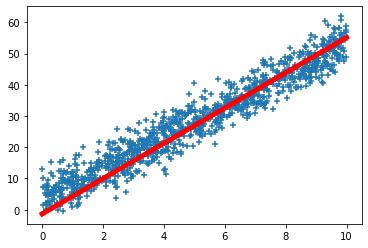

In [23]:
import matplotlib.pyplot as plt
def line_f(x):
    return np.array([x, 1]).dot(weights)

plt.figure()
plt.scatter(X, y, marker='+')
plt.plot([0, 10], [line_f(0), line_f(10)], linewidth=5, color="red")